## Import Libraries

In [92]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

## Import Data

In [93]:
df = pd.read_excel('premiums_young_with_gr.xlsx')

print(f'The number of Rows is {df.shape[0]}')
print(f'The number of Cols is {df.shape[1]}')

The number of Rows is 20096
The number of Cols is 14


In [94]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [95]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

## Data Cleaning

### Handle NA values

In [96]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [97]:
df.dropna(inplace=True)

In [98]:
df.shape

(20090, 14)

In [99]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### Handle Duplicates

In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Handle outliers

In [102]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


#### Handle Outliers : number_of_dependants

In [103]:
df[df.number_of_dependants < 0]['number_of_dependants'].unique()

array([-3, -1])

In [104]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

#### Handle Outliers : numerical columns

In [105]:
numerical_cols = df.select_dtypes(['float64', 'int64']).columns
numerical_cols

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

In [106]:
def boxPlots(data, cols):
    for col in cols:
        sns.boxplot(data, x=col)
        plt.show()

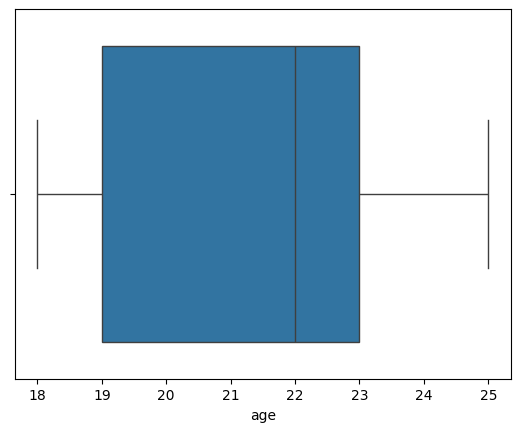

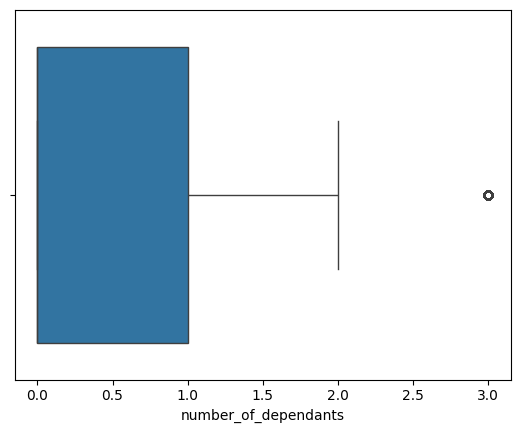

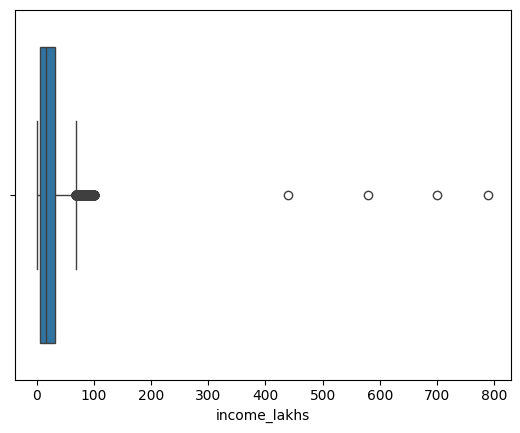

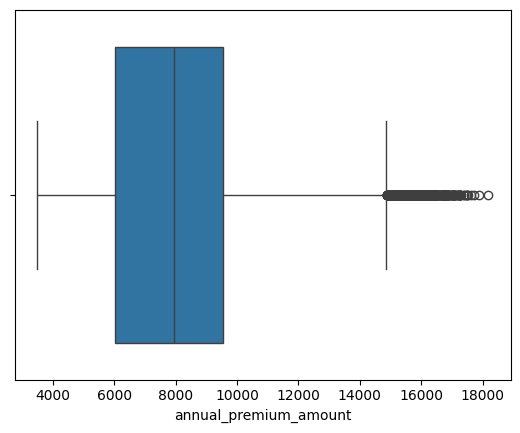

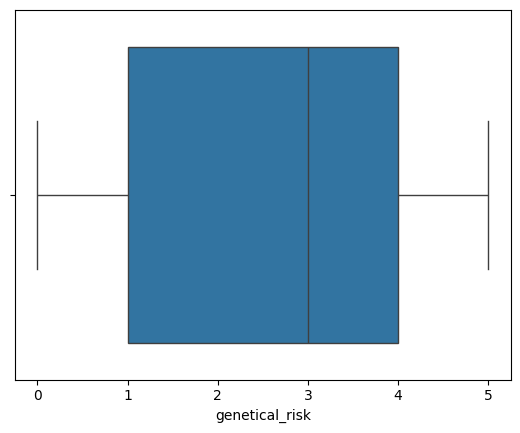

In [107]:
boxPlots(df, numerical_cols)

##### Handle Outliers : numerical columns (age)

In [108]:
df[df.age > 100].shape

(0, 14)

In [109]:
df1 = df[df.age < 100].copy()

In [110]:
df1.shape

(20090, 14)

In [111]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


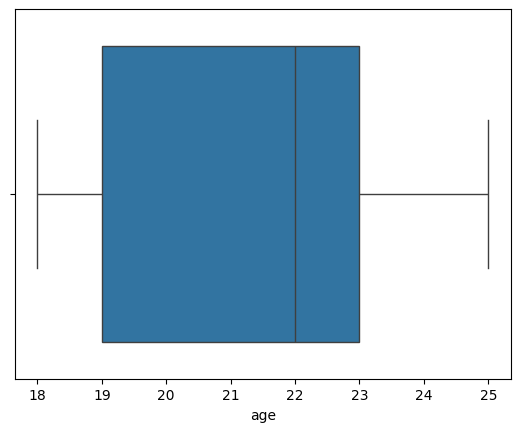

In [112]:
boxPlots(df1, ['age'])

##### Handle Outliers : numerical columns (income_lakhs)

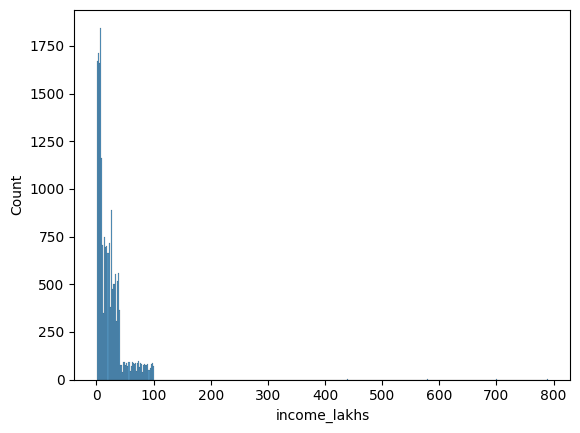

In [113]:
sns.histplot(df1, x='income_lakhs')
plt.show()

In [114]:
def get_iqr_bounds(col):
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

In [115]:
lower_bound, upper_bound = get_iqr_bounds(df1['income_lakhs'])
lower_bound, upper_bound

(-31.5, 68.5)

In [116]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [117]:
df2 = df1[df1.income_lakhs <= quantile_threshold].copy()
df2.shape

(20086, 14)

In [118]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


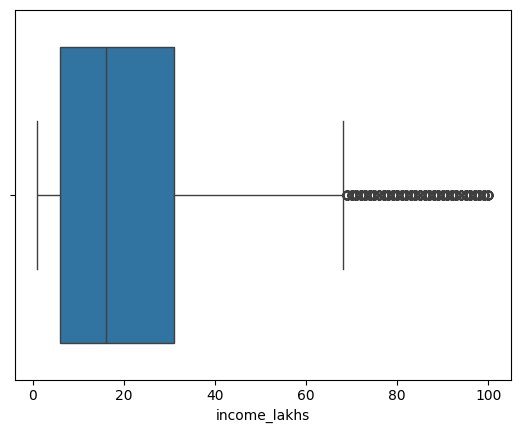

In [119]:
boxPlots(df2, ['income_lakhs'])

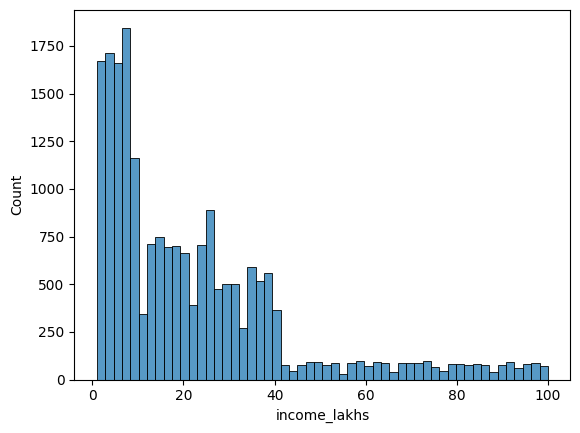

In [120]:
sns.histplot(df2, x='income_lakhs')
plt.show()

## Data Analysis

### Data Analysis : numerical columns

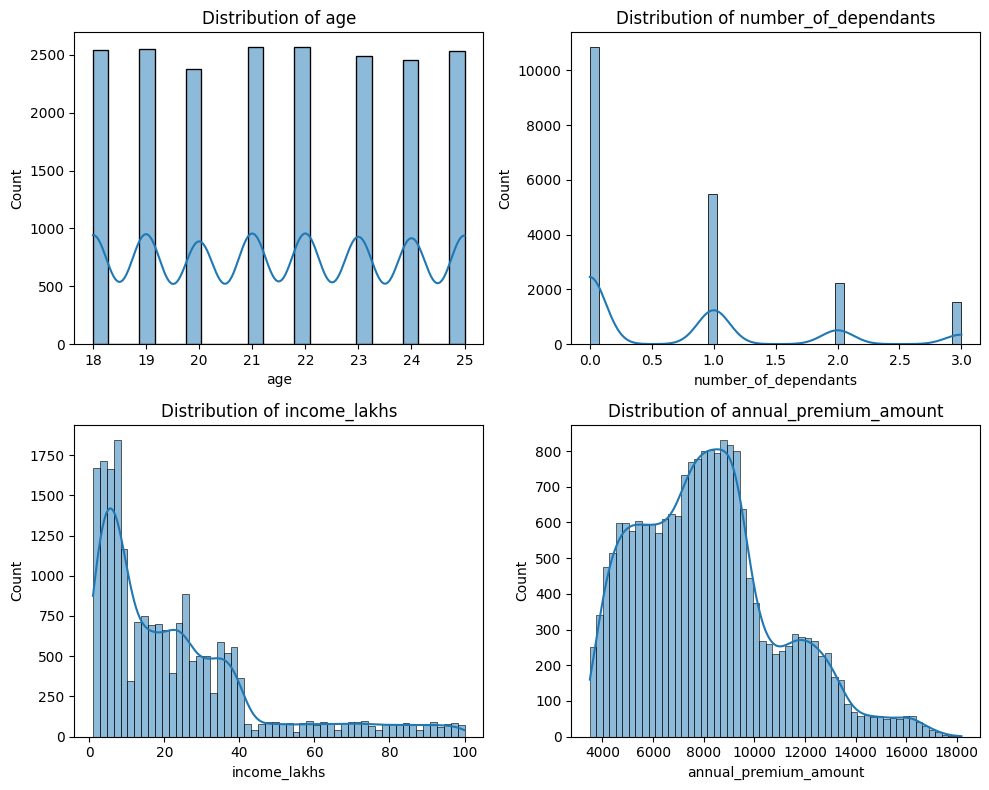

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid

for ax, col in zip(axes.flatten(), numerical_cols[:4]):  # [:4] just in case you have more than 4
    sns.histplot(df2, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

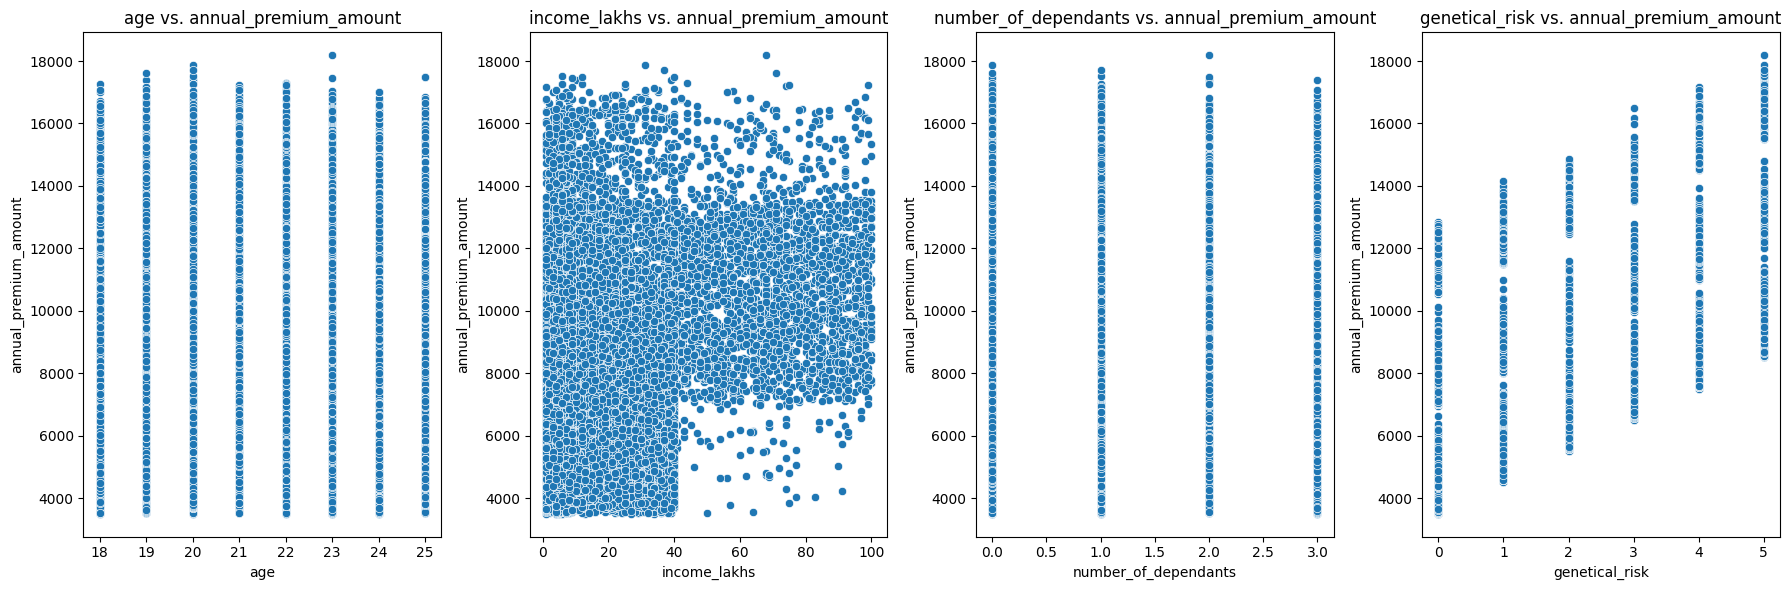

In [122]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants', 'genetical_risk']
target = 'annual_premium_amount'

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # 2x2 grid

for ax, col in zip(axes, numeric_features):
    sns.scatterplot(x=df2[col], y=df2[target], ax=ax)
    ax.set_title(f'{col} vs. {target}')
    ax.set_xlabel(col)
    ax.set_ylabel(target)

plt.tight_layout()
plt.show()

### Data Analysis : Categorical columns

In [123]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4


In [124]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']

categorical_cols

['gender',
 'region',
 'marital_status',
 'bmi_category',
 'smoking_status',
 'employment_status',
 'income_level',
 'medical_history',
 'insurance_plan']

In [125]:
for col in categorical_cols:
    print(f' {col} : {df2[col].unique()}')

 gender : ['Male' 'Female']
 region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
 marital_status : ['Unmarried' 'Married']
 bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
 smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
 employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
 income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
 medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
 insurance_plan : ['Silver' 'Bronze' 'Gold']


In [126]:
df2['smoking_status'].replace({
        'Smoking=0': 'No Smoking',
        'Does Not Smoke': 'No Smoking',
        'Not Smoking': 'No Smoking',
}, inplace=True)
df2.smoking_status.unique()

C:\Users\Ahmad Fahim\AppData\Local\Temp\ipykernel_7048\1051042033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

#### Univariate Analysis : Categorical columns

In [127]:
def barPlot(data, cols):
    n_cols = 3  # number of plots per row
    n_rows = (len(cols) + n_cols - 1) // n_cols  # ceiling division for rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()  # to loop easily

    for i, col in enumerate(cols):
        pct_count = data[col].value_counts(normalize=True)
        sns.barplot(x=pct_count.index, y=pct_count.values, ax=axes[i])
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Proportion')

    # Hide unused subplots if cols is not a multiple of 3
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

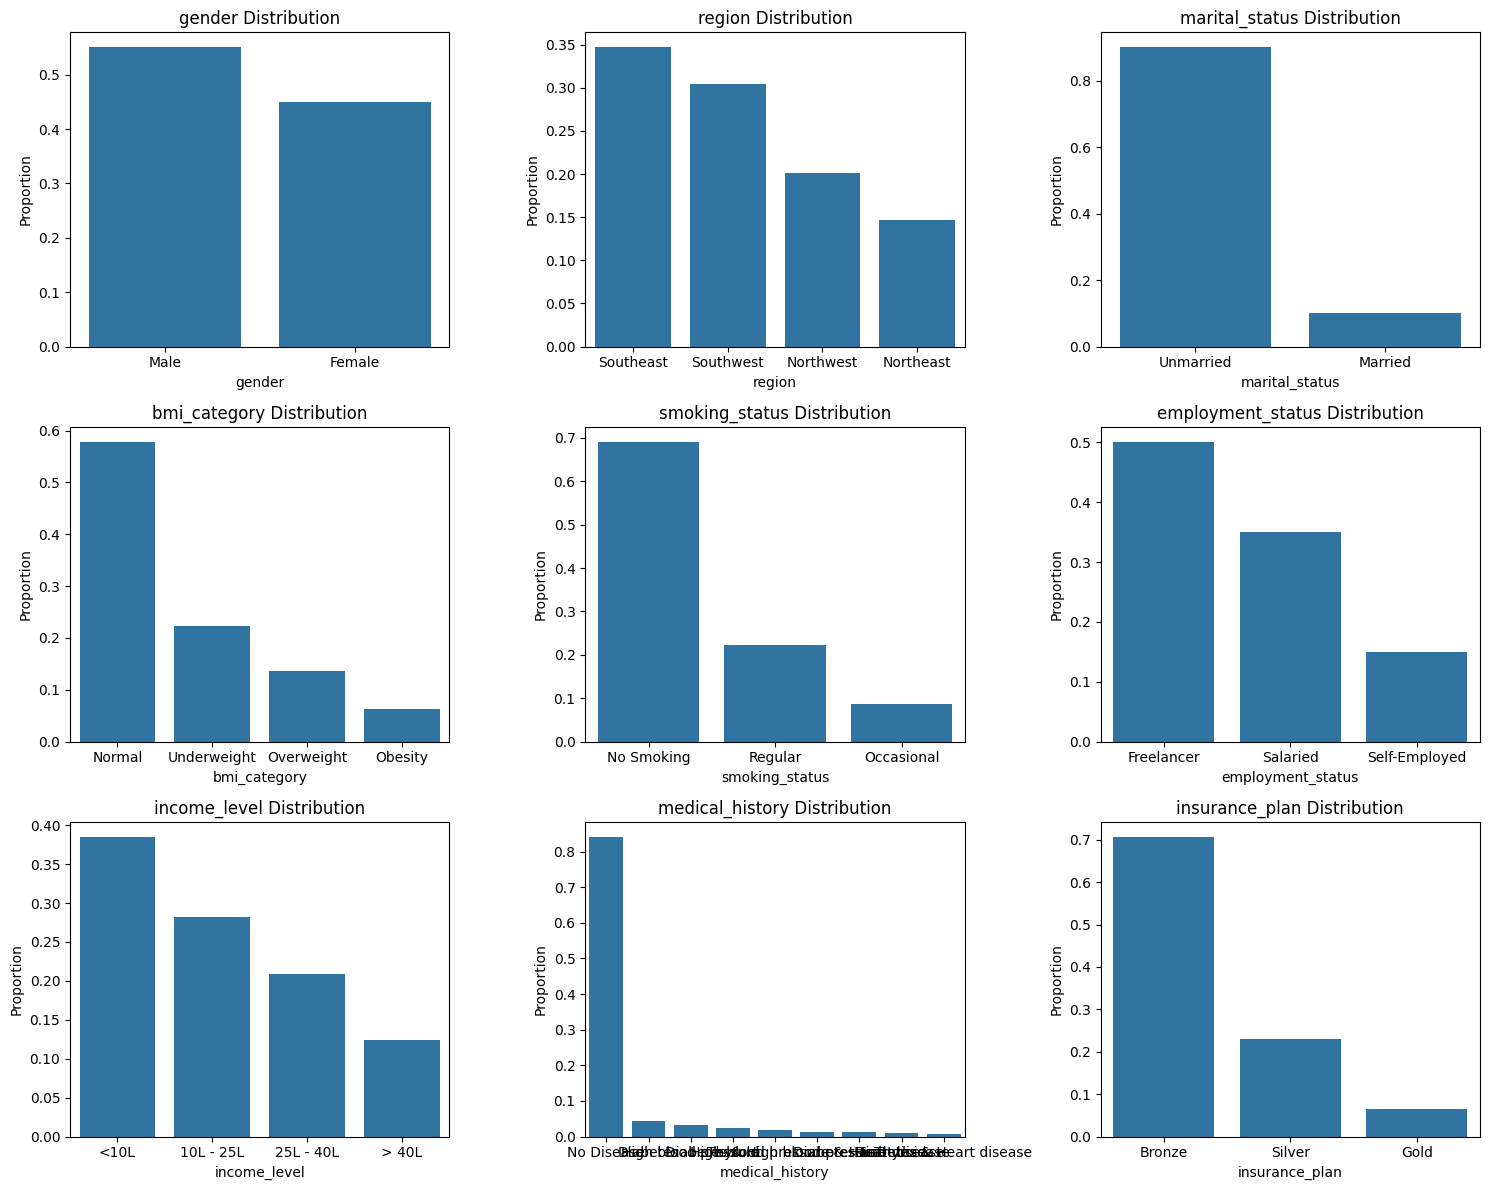

In [128]:
barPlot(df2, categorical_cols)

#### Bivariate Analysis : Categorical columns

In [129]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


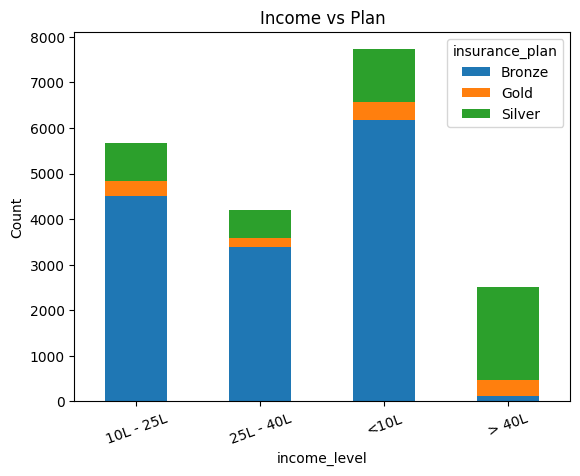

In [130]:
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.show()

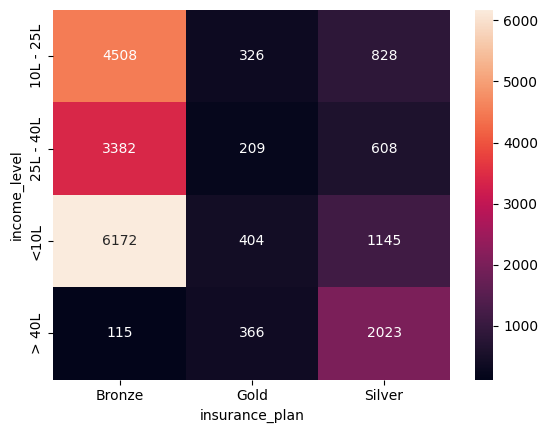

In [131]:
sns.heatmap(crosstab, annot=True, fmt='d')
plt.show()

## Feature Engineering

In [132]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [133]:
risk_scores_dictionary = {
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

In [134]:
df2[['disease1', 'disease2']] = df2.medical_history.str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,None


In [135]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

df2.head()

C:\Users\Ahmad Fahim\AppData\Local\Temp\ipykernel_7048\1524846493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\Ahmad Fahim\AppData\Local\Temp\ipykernel_7048\1524846493.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,0
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0


In [136]:
df2['total_risk_score'] = df2['disease1'].map(risk_scores_dictionary) + df2['disease2'].map(risk_scores_dictionary)

df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0


In [137]:
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000


In [138]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
8438,22,Female,Southeast,Unmarried,1,Normal,No Smoking,Freelancer,<10L,7,High blood pressure & Heart disease,Bronze,10593,5,high blood pressure,heart disease,14,1.0
12195,22,Male,Southwest,Unmarried,1,Normal,Regular,Freelancer,<10L,2,No Disease,Bronze,7006,2,no disease,none,0,0.0
3249,20,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,10L - 25L,24,No Disease,Bronze,8025,4,no disease,none,0,0.0
5537,22,Male,Southwest,Unmarried,1,Underweight,Regular,Freelancer,<10L,9,No Disease,Bronze,10130,5,no disease,none,0,0.0
728,22,Male,Southwest,Unmarried,0,Overweight,No Smoking,Freelancer,10L - 25L,21,No Disease,Silver,12947,5,no disease,none,0,0.0


In [139]:
insurance_plan_dictionary = {
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3,
}

df2['insurance_plan'] = df2['insurance_plan'].map(insurance_plan_dictionary)

In [140]:
df2['insurance_plan'].unique()

array([2, 1, 3])

In [141]:
income_level_dictionary = {
    '<10L': 1,
    '10L - 25L': 2,
    '25L - 40L': 3,
    '> 40L': 4,
}

df2['income_level'] = df2['income_level'].map(income_level_dictionary)

In [142]:
df2['income_level'].unique()

array([4, 1, 2, 3])

In [143]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,1,no disease,none,0,0.000000


In [144]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']

df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0


In [145]:
cols_to_drop = ['disease1', 'disease2', 'total_risk_score', 'medical_history']

df4 = df3.drop(cols_to_drop, axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


### Correlation Analysis

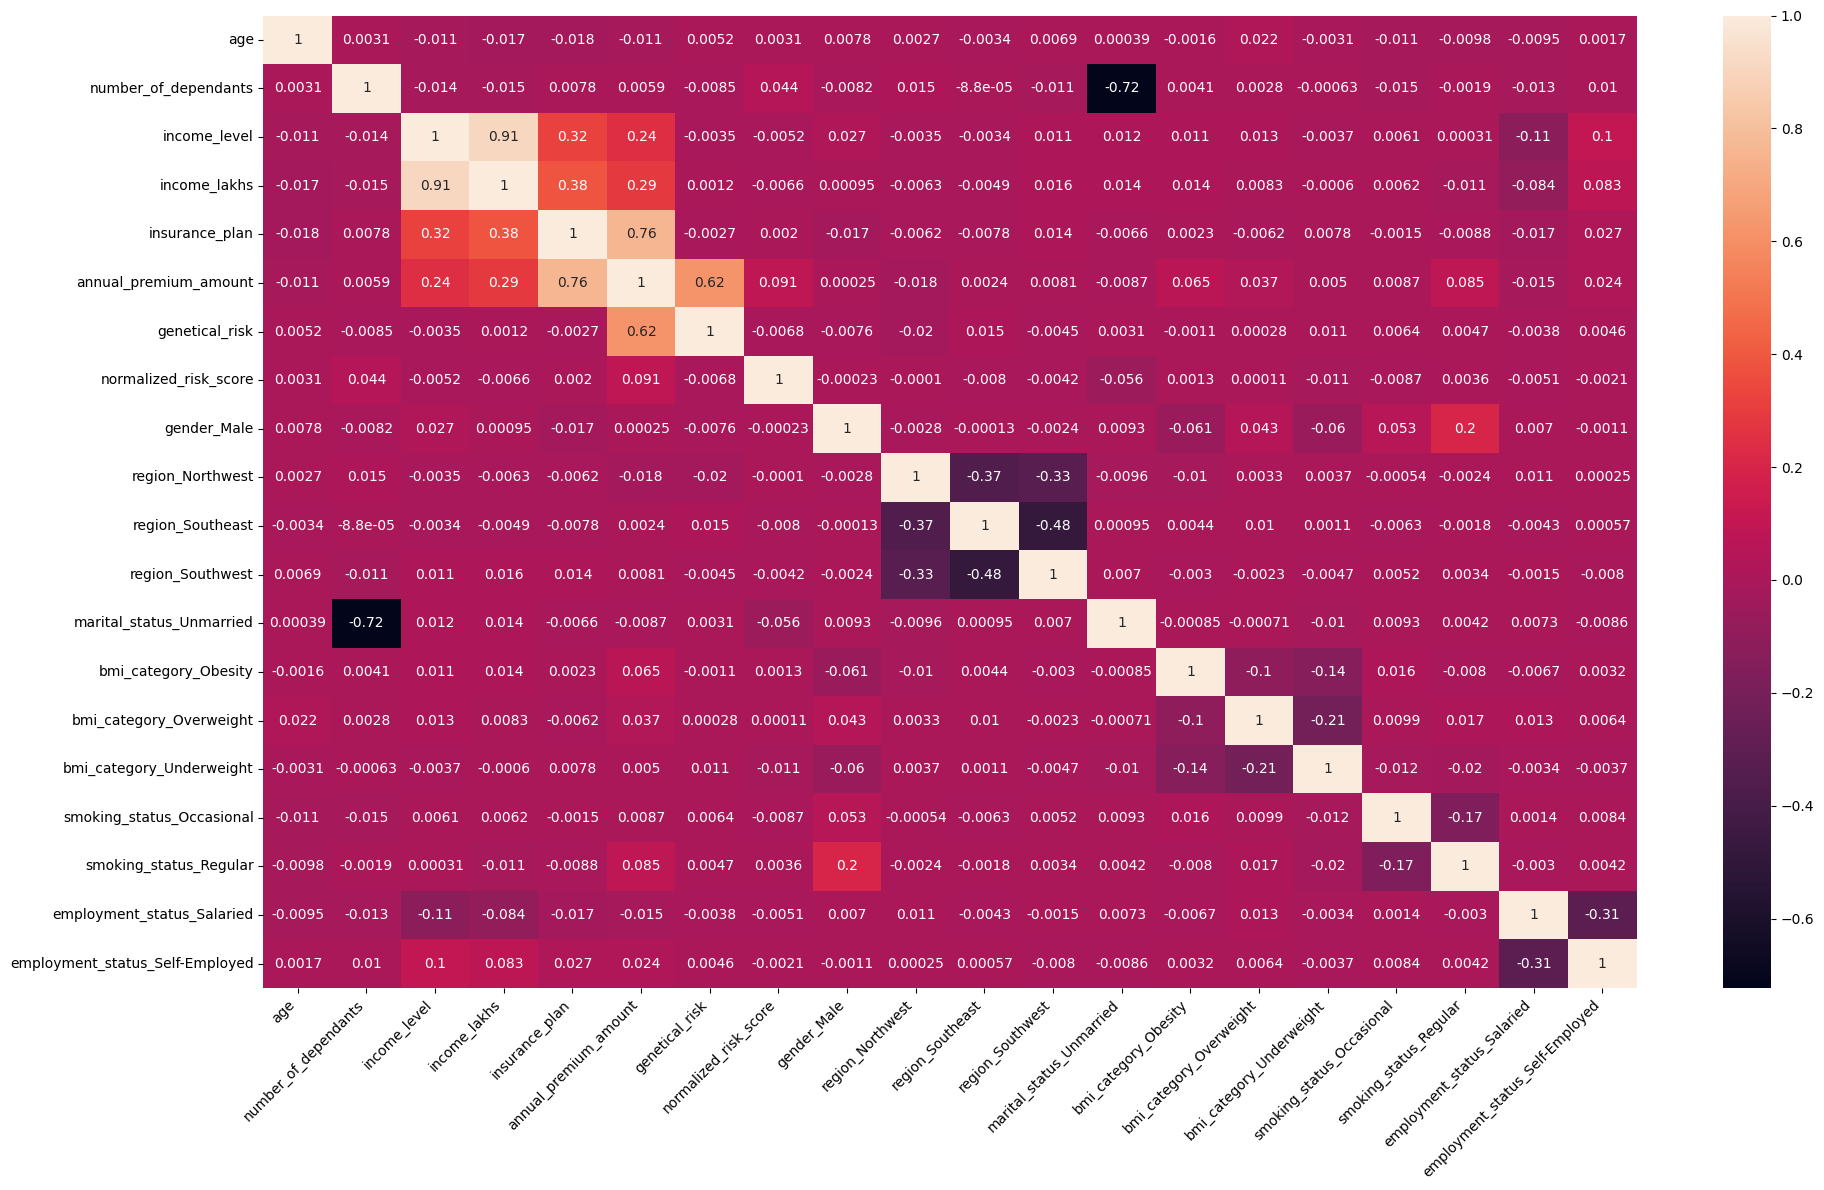

In [146]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

In [147]:
X = df4.drop(target, axis='columns')
y = df4[target]

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan', 'genetical_risk']

scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [148]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculateVIF(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [150]:
calculateVIF(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [151]:
X = X.drop('income_level', axis='columns')

calculateVIF(X)

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [152]:
X.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


## Model Training

In [153]:
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)

### Linear Regression

In [154]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [155]:
train_score = model_LR.score(X_train, y_train)
test_score = model_LR.score(X_test, y_test)

print(f'Training data score: {train_score}')
print(f'Test data score: {test_score}')

Training data score: 0.988297900194864
Test data score: 0.9887263253056615


In [156]:
y_pred = model_LR.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')
print(f'R2 Score: {r2}')

Mean Squared Error: 85732.34377930452
Root Mean Squared Error: 292.8008602776032
R2 Score: 0.9886503478416548


In [157]:
X.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalized_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [158]:
model_LR.coef_

array([-7.22903185e+00,  1.95361819e+01, -1.26452776e+00,  7.00112526e+03,
        4.99698873e+03,  1.10914836e+03,  8.17798831e+00,  1.67735268e+00,
       -3.27532710e+00,  6.31709531e+00,  1.60689716e+01,  8.12844929e+02,
        4.00375598e+02,  1.07529819e+02,  2.05069661e+02,  6.10983280e+02,
        3.87836470e-02, -5.24201812e+00])

In [159]:
model_LR.intercept_

np.float64(3978.8235284382563)

In [160]:
feature_importances = model_LR.coef_

coef_df = pd.DataFrame(feature_importances, columns=['Coefficients'], index=X.columns)
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
coef_df

,Coefficients
age,-7.229032
employment_status_Self-Employed,-5.242018
region_Southeast,-3.275327
income_lakhs,-1.264528
employment_status_Salaried,0.038784
region_Northwest,1.677353
region_Southwest,6.317095
gender_Male,8.177988
marital_status_Unmarried,16.068972
number_of_dependants,19.536182


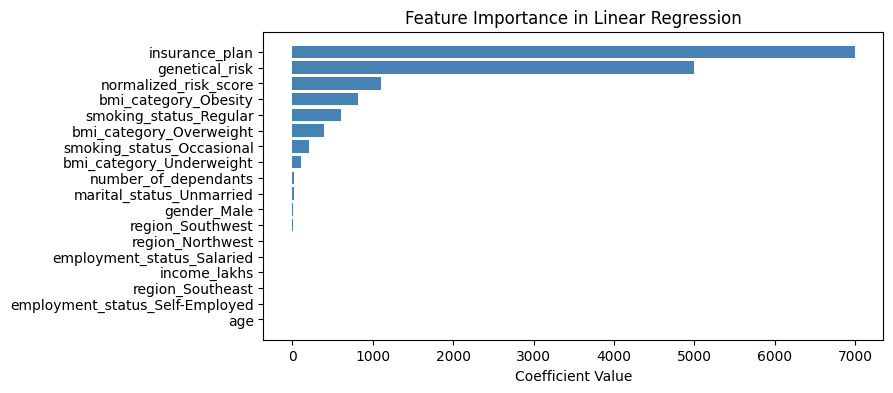

In [161]:
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df[ 'Coefficients'], color='steelblue') 
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Ridge Regression

In [162]:
model_RG = Ridge()
model_RG.fit(X_train, y_train)

Ridge()

In [163]:
train_score = model_RG.score(X_train, y_train)
test_score = model_RG.score(X_test, y_test)

print(f'Training data score: {train_score}')
print(f'Test data score: {test_score}')

Training data score: 0.9882972960153418
Test data score: 0.9887275909694276


In [164]:
y_pred = model_RG.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')
print(f'R2 Score: {r2}')

Mean Squared Error: 85722.71885007393
Root Mean Squared Error: 292.78442385153267
R2 Score: 0.9886350139526165


### XGBoost

In [165]:
from xgboost import XGBRegressor

model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [166]:
train_score = model_XGB.score(X_train, y_train)
test_score = model_XGB.score(X_test, y_test)

print(f'Training data score: {train_score}')
print(f'Test data score: {test_score}')

Training data score: 0.9925054907798767
Test data score: 0.987729549407959


In [167]:
y_pred = model_XGB.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')
print(f'R2 Score: {r2}')

Mean Squared Error: 93312.703125
Root Mean Squared Error: 305.47128036036383
R2 Score: 0.9876517653465271


In [168]:
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search= RandomizedSearchCV(model_XGB, param_grid, n_iter=10, cv=3, scoring='r2', random_state=4)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9884945352872213)

In [189]:
best_model = model_LR

In [172]:
feature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances, columns=['Coefficients'], index=X.columns)
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
coef_df

,Coefficients
employment_status_Salaried,0.000000
region_Northwest,0.000072
region_Southwest,0.000095
number_of_dependants,0.000106
age,0.000119
gender_Male,0.000124
marital_status_Unmarried,0.000125
region_Southeast,0.000166
income_lakhs,0.000172
employment_status_Self-Employed,0.000175


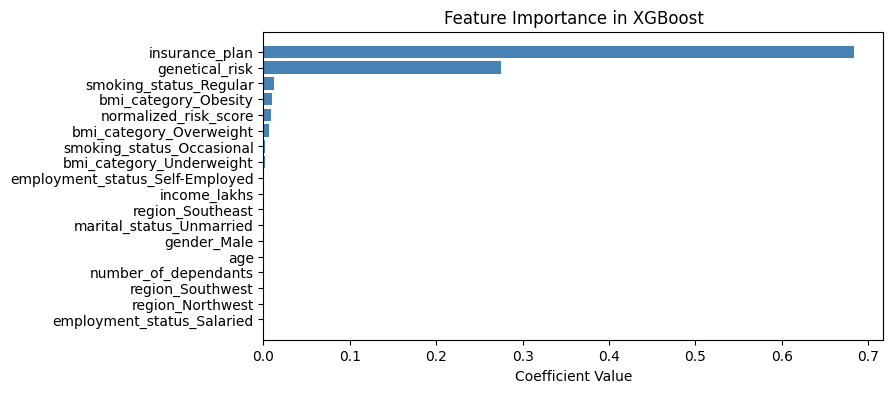

In [173]:
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df[ 'Coefficients'], color='steelblue') 
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

## Error Analysis

In [190]:
y_pred = best_model.predict(X_test)

In [191]:
residuals = y_pred - y_test
residuals_pct = residuals * 100 / y_test

In [192]:
results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct,
})
results_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6121.456891,-116.543109,-1.868277
14758,9462,9601.797510,139.797510,1.477463
13205,5152,5611.056493,459.056493,8.910258
14278,6988,7423.486322,435.486322,6.231916
19351,4917,5112.056543,195.056543,3.966983


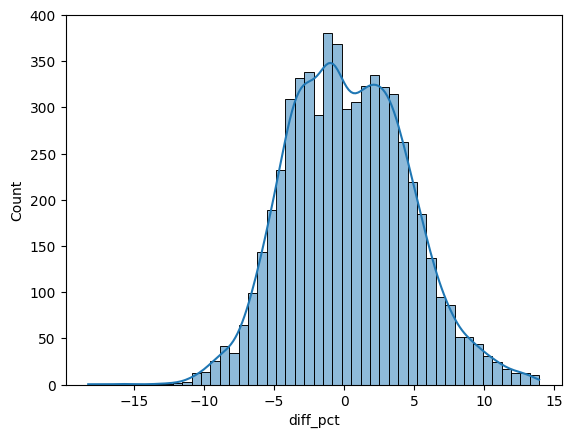

In [193]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.show()

In [194]:
threshold_margin_of_error = 10
extreme_results_df = results_df[np.abs(results_df.diff_pct) > threshold_margin_of_error]

In [195]:
extreme_errors_pct = extreme_results_df.shape[0] * 100 / results_df.shape[0]
print(f'Number of rows in results : {results_df.shape[0]}')
print(f'Number of rows in extreme error : {extreme_results_df.shape[0]}')
print(f'Percentage: {extreme_errors_pct}')

Number of rows in results : 6026
Number of rows in extreme error : 129
Percentage: 2.140723531364089


In [196]:
results_df[np.abs(results_df.diff_pct) > threshold_margin_of_error].sort_values('diff_pct', ascending=False)

,actual,predicted,diff,diff_pct
42,3602,4102.977542,500.977542,13.908316
11325,3609,4105.397511,496.397511,13.754434
4692,3516,3995.396631,479.396631,13.634716
17205,3629,4117.664478,488.664478,13.465541
4169,3517,3990.373540,473.373540,13.459583
...,...,...,...,...
3241,8291,7246.252440,-1044.747560,-12.600984
6346,7777,6733.830881,-1043.169119,-13.413516
6235,5473,4637.029120,-835.970880,-15.274454
14450,5517,4627.444220,-889.555780,-16.123904


In [197]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(5)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12669,0.857143,0.000000,0.000000,0.0,0.0,0.0,1,0,1,0,1,0,1,0,0,0,1,0
2918,0.285714,0.000000,0.151515,0.0,0.2,0.0,1,1,0,0,1,0,0,0,0,0,1,0
17084,1.000000,0.000000,0.353535,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0
7181,0.571429,0.000000,0.161616,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0
12285,0.428571,0.333333,0.232323,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0


In [198]:
import math

def compareHistPlot(data1, data2, cols):
    num_cols = len(cols)
    rows = math.ceil(num_cols / 3)  # Max 3 charts per row
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten in case of multiple rows

    for i, col in enumerate(cols):
        sns.histplot(data1[col], kde=True, label='Overall', color='blue', ax=axes[i])
        sns.histplot(data2[col], kde=True, label='Errors', alpha=0.5, color='red', ax=axes[i])
        axes[i].legend()
        axes[i].set_title(f'Distribution of {col} for Errors vs Overall')

    # Hide unused subplots (if any)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

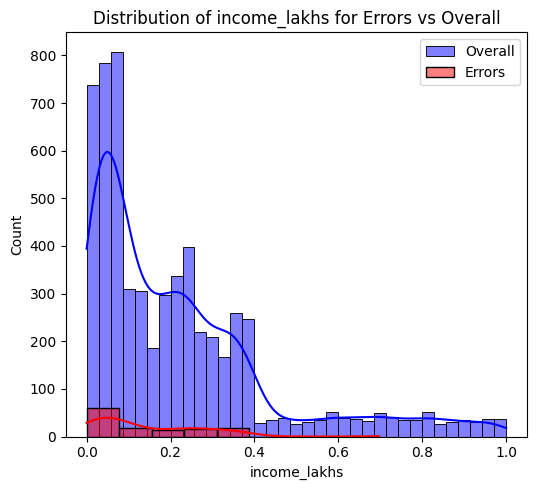

In [199]:
compareHistPlot(X_test, extreme_errors_df, ['income_lakhs'])

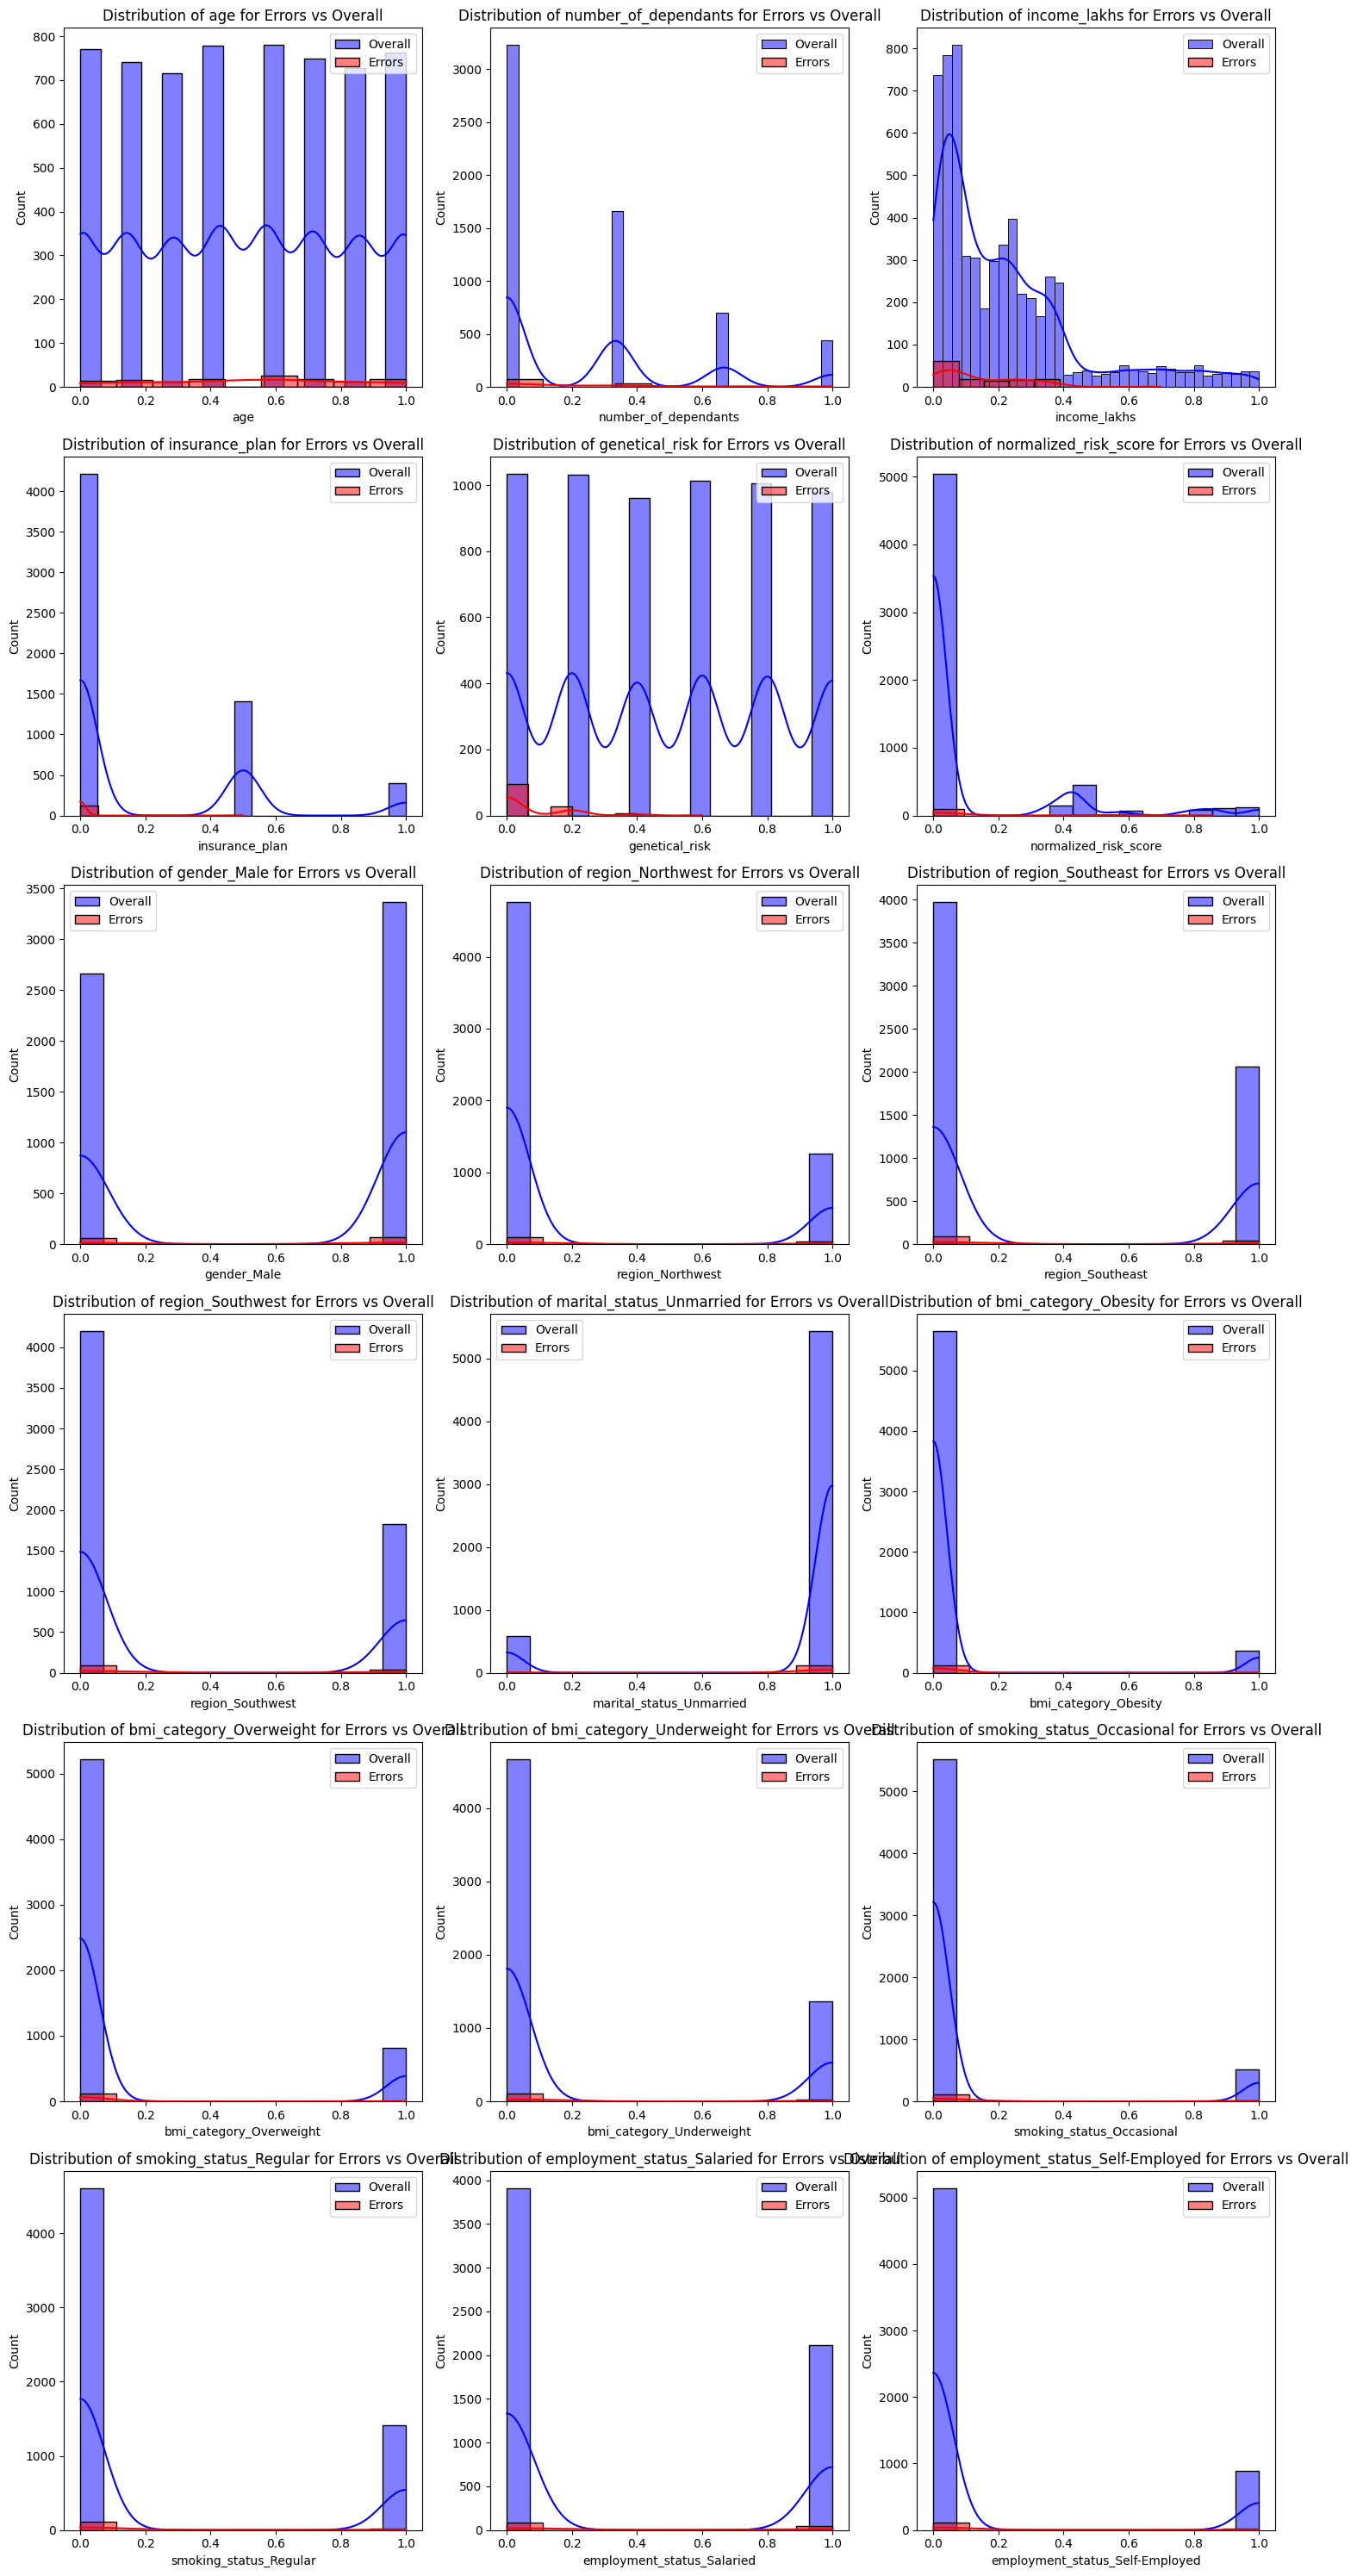

In [200]:
compareHistPlot(X_test, extreme_errors_df, X.columns)

In [201]:
extreme_errors_df['income_level'] = -1

In [202]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
0,24.0,0.0,-2.0,1.0,1.0,0.0
1,20.0,0.0,-2.0,16.0,1.0,1.0
2,25.0,0.0,-2.0,36.0,1.0,0.0
3,22.0,0.0,-2.0,17.0,1.0,0.0
4,21.0,1.0,-2.0,24.0,1.0,0.0
...,...,...,...,...,...,...
124,18.0,0.0,-2.0,17.0,1.0,1.0
125,20.0,0.0,-2.0,25.0,1.0,1.0
126,19.0,0.0,-2.0,32.0,1.0,0.0
127,25.0,2.0,-2.0,1.0,1.0,3.0


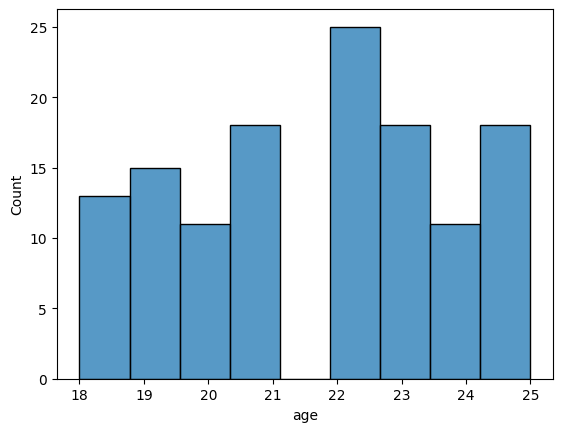

In [203]:
sns.histplot(df_reversed, x='age')
plt.show()

In [204]:
df_reversed['age'].quantile(0.98)

np.float64(25.0)

## Export Model

In [ ]:
from joblib import dump

dump(best_model, 'artifacts/model_young.joblib')

['artifacts/model_young.joblib']

In [207]:
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': cols_to_scale,
}

In [208]:
dump(scaler_with_cols, 'artifacts/scaler_young.joblib')

['artifacts/scaler_young.joblib']